In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df['total_add_ons'] = df['wants_extra_baggage'] + df['wants_in_flight_meals'] + df['wants_preferred_seat']

In [6]:
df.drop(columns=['wants_extra_baggage', 'wants_in_flight_meals', 'wants_preferred_seat'], inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,total_add_ons
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,5.52,0,2
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,5.52,0,2


In [7]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [8]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[df_cat.columns] = encoder.fit_transform(df_cat)

In [9]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,total_add_ons
0,2,0.0,2.0,262,19,7,2.0,0.0,61.0,5.52,0,1
1,1,0.0,2.0,112,20,3,2.0,0.0,61.0,5.52,0,0
2,2,0.0,2.0,243,22,17,6.0,0.0,36.0,5.52,0,2
3,1,0.0,2.0,96,31,4,2.0,0.0,61.0,5.52,0,1
4,2,0.0,2.0,68,22,15,6.0,0.0,36.0,5.52,0,2


In [10]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x = df.drop('booking_complete', axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [14]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [15]:
model_dict = {'Random Forest': {'model': RandomForestClassifier(random_state=42)},
            'Gradient Boosting': {'model': GradientBoostingClassifier(random_state=42)},
            'Ada Boost': {'model': AdaBoostClassifier(random_state=42)},
            'XGB': {'model': XGBClassifier(random_state=42)},
            'SGD': {'model': SGDClassifier(random_state=42)},
            'GaussianNB': {'model': GaussianNB()}}

In [16]:
results = []

# Train each model and evaluate
for name, model_info in model_dict.items():
    model = model_info['model']
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Precision_1': precision_1,
        'Recall_0': recall_0,
        'Recall_1': recall_1,
        'F1_0': f1_0,
        'F1_1': f1_1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
results_df

,Model,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,Random Forest,0.8524,0.863092,0.531056,0.982244,0.114305,0.918821,0.188119
1,Gradient Boosting,0.8507,0.853627,0.517241,0.995061,0.030080,0.918934,0.056854
2,Ada Boost,0.8504,0.853226,0.500000,0.995296,0.026738,0.918802,0.050761
3,XGB,0.8468,0.862596,0.453368,0.975188,0.116979,0.915443,0.185972
4,SGD,0.8504,0.850400,0.000000,1.000000,0.000000,0.919153,0.000000
5,GaussianNB,0.8338,0.855909,0.286082,0.967427,0.074198,0.908258,0.117834


In [18]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def tune_and_evaluate_models(X_train, y_train, X_test, y_test):
    # Models and their hyperparameter grids
    models = {
        'RandomForest': (RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }),
        'GradientBoosting': (GradientBoostingClassifier(random_state=42), {
            'n_estimators': [100, 150, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.8, 0.9, 1.0]
        }),
        'AdaBoost': (AdaBoostClassifier(random_state=42), {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }),
        'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5, 6],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'gamma': [0, 0.1, 0.2]
        }),
        'SGD': (SGDClassifier(random_state=42), {
            'loss': ['hinge', 'log', 'modified_huber'],
            'penalty': ['l2', 'l1', 'elasticnet'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'max_iter': [1000, 1500, 2000],
            'eta0': [0.01, 0.1, 1.0]
        }),
        'GaussianNB': (GaussianNB(), {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        })
    }

    results = {}

    for model_name, (model, param_grid) in models.items():
        print(f"Running GridSearchCV for {model_name}...")
        
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
        
        # Fit the model
        grid_search.fit(X_train, y_train)
        
        # Get best model, parameters, and score
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # Evaluate on test data
        y_pred = best_model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store results
        results[model_name] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_score': best_score,
            'classification_report': report
        }
        
        print(f"Best Parameters for {model_name}: {best_params}")
        print(f"Best Cross-Validation Score for {model_name}: {best_score}")
        print(f"Classification Report for {model_name} on Test Data:\n{classification_report(y_test, y_pred)}\n")

    return results

# Example usage:
results = tune_and_evaluate_models(X_train_resampled, y_train_resampled, x_test, y_test)'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import classification_report\n\ndef tune_and_evaluate_models(X_train, y_train, X_test, y_test):\n    # Models and their hyperparameter grids\n    models = {\n        \'RandomForest\': (RandomForestClassifier(random_state=42), {\n            \'n_estimators\': [100, 200, 300],\n            \'max_depth\': [None, 10, 20, 30],\n            \'min_samples_split\': [2, 5, 10],\n            \'min_samples_leaf\': [1, 2, 4],\n            \'bootstrap\': [True, False]\n        }),\n        \'GradientBoosting\': (GradientBoostingClassifier(random_state=42), {\n            \'n_estimators\': [100, 150, 200],\n            \'learning_rate\': [0.01, 0.05, 0.1],\n            \'max_depth\': [3, 4, 5],\n            \'min_samples_split\': [2, 5, 10],\n            \'min_samples_leaf\': [1, 2, 4],\n            \'subsample\': [0.8, 0.9, 1.0]\n        }),\n        \'AdaBoost\': (AdaBoostClassifier(random_state=42), {\n            \'n_estimat

In [20]:
hyp_model_dict = {'Random Forest': {'model': RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300, random_state=42)},
            'Gradient Boosting': {'model': GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 200, subsample= 1.0,random_state=42)},
            'Ada Boost': {'model': AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.0, n_estimators= 150, random_state=42)},
            'XGB': {'model': XGBClassifier(colsample_bytree= 0.8, gamma= 0, learning_rate= 0.1, max_depth= 6, min_child_weight= 1, n_estimators= 300, subsample= 0.8, random_state=42)},
            'SGD': {'model': SGDClassifier(alpha= 0.0001, eta0= 0.1, learning_rate= 'invscaling', loss= 'hinge', max_iter= 1000, penalty= 'l1', random_state=42)},
            'GaussianNB': {'model': GaussianNB(var_smoothing= 1e-09)}}

In [23]:
results = []

# Train each model and evaluate
for name, model_info in hyp_model_dict.items():
    model = model_info['model']
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Precision_1': precision_1,
        'Recall_0': recall_0,
        'Recall_1': recall_1,
        'F1_0': f1_0,
        'F1_1': f1_1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [24]:
results_df

,Model,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,Random Forest,0.8379,0.871211,0.414266,0.949788,0.201872,0.908805,0.271461
1,Gradient Boosting,0.8477,0.864695,0.468531,0.973189,0.134358,0.915740,0.208831
2,Ada Boost,0.7892,0.895303,0.339791,0.851717,0.433824,0.872966,0.381092
3,XGB,0.8477,0.865996,0.470842,0.971190,0.145722,0.915581,0.222563
4,SGD,0.5866,0.911178,0.218523,0.569379,0.684492,0.700825,0.331284
5,GaussianNB,0.3962,0.928720,0.181218,0.314087,0.862968,0.469420,0.299536


In [28]:
# Apply ADASYN to the training data
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_resampled_a, y_resampled_a = adasyn.fit_resample(X_train_resampled, y_train_resampled)

In [29]:
results = []

# Train each model and evaluate
for name, model_info in hyp_model_dict.items():
    model = model_info['model']
    model.fit(X_resampled_a, y_resampled_a)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Precision_1': precision_1,
        'Recall_0': recall_0,
        'Recall_1': recall_1,
        'F1_0': f1_0,
        'F1_1': f1_1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [30]:
results_df

,Model,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,Random Forest,0.8379,0.871211,0.414266,0.949788,0.201872,0.908805,0.271461
1,Gradient Boosting,0.8477,0.864695,0.468531,0.973189,0.134358,0.915740,0.208831
2,Ada Boost,0.7892,0.895303,0.339791,0.851717,0.433824,0.872966,0.381092
3,XGB,0.8477,0.865996,0.470842,0.971190,0.145722,0.915581,0.222563
4,SGD,0.5866,0.911178,0.218523,0.569379,0.684492,0.700825,0.331284
5,GaussianNB,0.3962,0.928720,0.181218,0.314087,0.862968,0.469420,0.299536


[0.03766049 0.01227571 0.00111357 0.10866463 0.17288399 0.09738265
 0.07798451 0.11864886 0.19646275 0.11751064 0.05941219]
            Feature  Importance
8    booking_origin    0.196463
4    length_of_stay    0.172884
7             route    0.118649
9   flight_duration    0.117511
3     purchase_lead    0.108665
5       flight_hour    0.097383
6        flight_day    0.077985
10    total_add_ons    0.059412
0    num_passengers    0.037660
1     sales_channel    0.012276
2         trip_type    0.001114


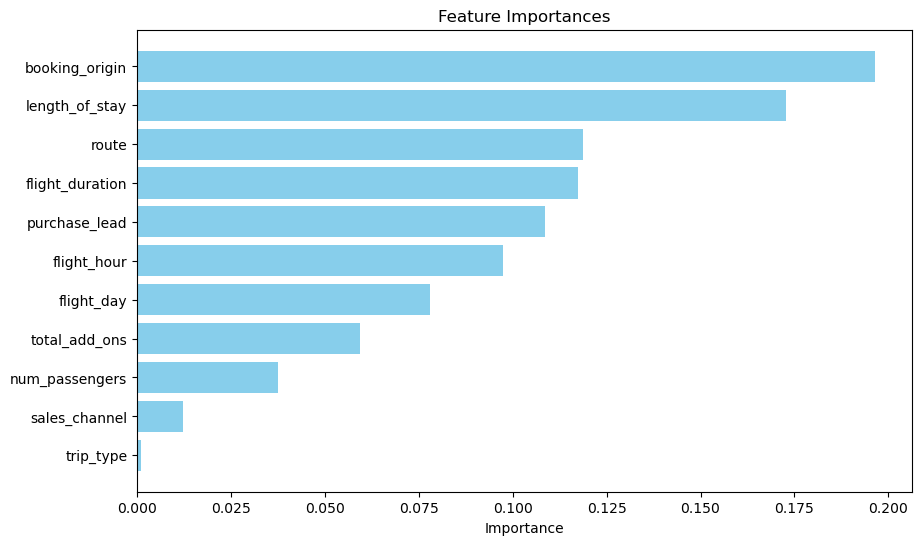

In [39]:
rf_model = hyp_model_dict['Random Forest']['model']

feature_importances = rf_model.feature_importances_
print(feature_importances)
# Creating a DataFrame for better visualization
features = x.columns  
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Displaying feature importances
print(importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()